## Classification

In this lecture we will go through Titanic data set. Afterwards you will publish your results on the official Kaggle website. This project would give you an idea of the end-to-end pipeline to build machine learning algorithms for classification. Don't worry if something is not 100% clear, just write it down and either ask me or your colleagues for help. 

====================================================================================================

## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

====================================================================================================

To download the Titanic data, go ahead to this website:
https://www.kaggle.com/c/titanic/data

Click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Save it in a folder of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.


====================================================================================================

## Titanic dataset

In [311]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt


# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
import random

### Task 1.
- Load in the train data set and save it as "data"
- Take a quick glance over the data

In [312]:
# load dataset
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Task 2.
- Load the dataset for submission (the one on which our model will be evaluated by Kaggle) it contains exactly the same variables, but not the target.
- Save the load as "submission".
- Take a quick glance over the submission data set

In [216]:
submission = pd.read_csv('test.csv')
submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Task 3.
- Figure out what type of variable types are in the data set

In [217]:
# Use pandas methods for that 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.
### Task 4. 
- How many unique PassangerIds there are? Print it out in a sentance: "Number of PassangerId labels: (some number)"
- print out the "Number of passengers on the Titanic was: (some number)"

In [218]:
print('Number of PassengerId labels: ', len(data.PassengerId.unique()))
print('Number  of passengers on the Titanic: ', len(data))

Number of PassengerId labels:  891
Number  of passengers on the Titanic:  891


PassengerId is a unique identifier for each of the passengers. Thus this is not a variable that we can use.

### Task 5. 
- Create a data frame that only includes categorical data types
- Name that variable as "categorical"

Help: 
- 'b'       boolean
- 'i'       (signed) integer
- 'u'       unsigned integer
- 'f'       floating-point
- 'c'       complex-floating point
- 'O'       (Python) objects
- 'S', 'a'  (byte-)string
- 'U'       Unicode
- 'V'       raw data (void)

In [219]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


### Task 6.
- Create a data frame that only includes numerical data types
- Name that variable as "numerical"

In [220]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


### Task 7.
- Figure out which categorical features are in a way both categorical and numerical. Meaning they have both type of values within them self

In [221]:
# view of categorical variables
data[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


- 2 potential mixed type of variables: Ticket and Cabin

x and x contain both numbers and letters. We could extract the numerical part and then the non-numerical part and generate 2 variables out of them, to see if that adds value to our predictive models.

### Task 8.
- Figure out how many discrete, continous, Id and binary variables there are.

In [222]:
# view of numerical variables
data[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


- 3 Discrete variables: x, x and x
- 2 continuous variables: x andxAge
- 1 Id variable: x (it is a label for each of the passengers)
- 1 binary: x (target variable).

### Task 9. 
- Print out for all the discrete variables all the unique values that they have

In [223]:
# let's visualise the values of the discrete variables
for var in ['Pclass',  'SibSp', 'Parch']:
    print(var, ' values: ', data[var].unique())

Pclass  values:  [3 1 2]
SibSp  values:  [1 0 3 4 2 5 8]
Parch  values:  [0 1 2 5 3 4 6]


### Task 10. 
- Fill in a brief summary of data types that are in the data set

#### Types of variables, summary:

- x categorical variables: from them x could be treated as mixed type of variables (numbers and strings)
- x numerical variables: x discrete, x continuous, x Id, and x binary target

### Types of problems within the variables 

#### Missing values

### Task 11. 
- Figure out the percentage of missing values for all features in the "data" data set. 

In [314]:
# let's visualise the percentage of missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Task 12.
Fill in the missing values that are in the data set: 

Three of the variables contain missing data, Age (~20%), Cabin (~77%) and Embarked (< 1%)

### Task 13. 
- From the "numerical" data frame, exclude 'Survived', 'PassengerId' variables and save it to "numerical"

In [225]:
numerical = [var for var in numerical if var not in['Survived', 'PassengerId']]
numerical

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Task 14.
- Set figuresize to 15 and 6
- Set subplot to have 1, 2, 1 (subplot(nrows, ncols, index, **kwargs))
- For the boxplot select column Age
- Add a title based on your findings 
- Add for ylabel Age

- Second visualization is for the Fare feature


Text(0, 0.5, 'Fare')

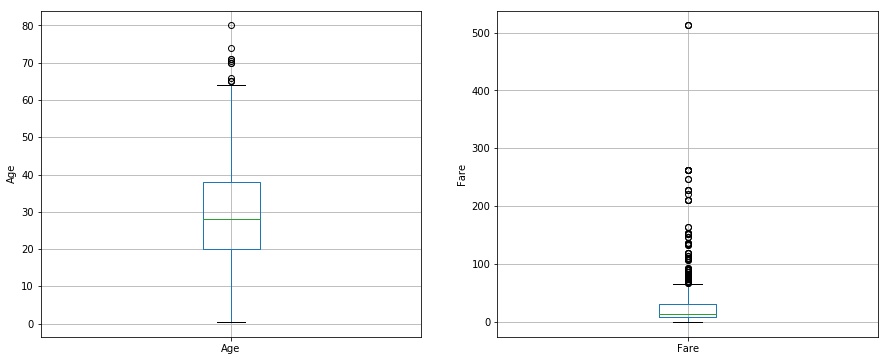

In [226]:
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

Both Age and Fare contain outliers. Let's find which valuers are the outliers

### Task 15. 
- replace x with an approproate variable (Age, Fare)

Text(0.5, 0, 'Fare')

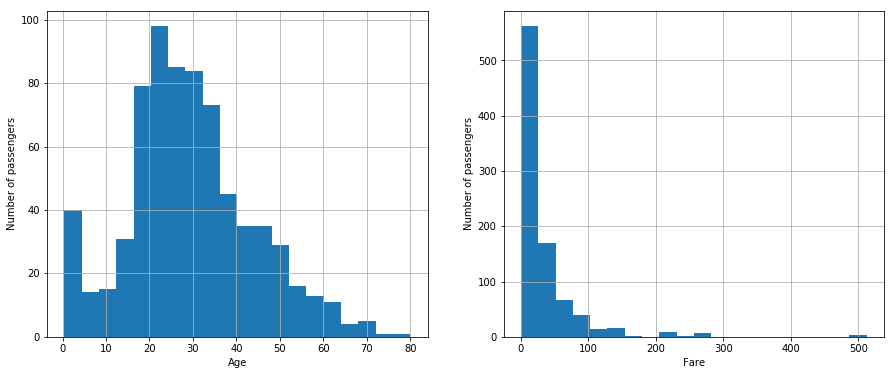

In [227]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare

In [228]:
# find outliers

# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Age outliers are values < -13.88037434994331 or > 73.27860964406095
Fare outliers are values < -61.358399999999996 or > 100.2688


We  should remove from the dataset Ages > 73 or Fares > 100.

There are a few methods to handle outliers, one is top-coding, the other one is discretisation of variables. **I will use top-coding for Age, and discretisation for Fare**.

#### Outlies in discrete variables

Let's calculate the percentage of passengers for each  of the values that can take the discrete variables in the titanic dataset. I will call outliers, those values that are present in less than 1% of the passengers. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

### Task 16. 
- fill in the x's with discreate variables

In [229]:
# outlies in discrete variables
for var in ['Pclass',  'SibSp', 'Parch']:
    print(data[var].value_counts() / np.float(len(data)))
    print()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64



### Task 17.
- Instead of x's put appropriate name of the feautes

**x** does not contain outliers, as all its numbers are present in at least 20% of the passengers.

**x**
This variable indicates the number of of siblings / spouses aboard the Titanic. Values bigger than 4, are rare. So I will cap this variable at 4 (top coding).

**x** 
This variable indicates the number of parents / children aboard the Titanic. We can see that values > 2 are rare (present in less than 1% of passengers). Thus I will cap this variable at 2 (top-coding).


#### Number of labels: cardinality

### Task 18.
- Find out which variables (categoricals) have high cardinality (lots of groups)

The variables x, x and x are highly cardinal, i.e., they contain a lot of labels. In addition, those variables are not usable as such, and they require some manual preprocessing. I will do that before proceeding with the data exploration

In [230]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Name  contains  891  labels
Sex  contains  2  labels
Ticket  contains  681  labels
Cabin  contains  148  labels
Embarked  contains  4  labels


### Pre-processing of mixed type of variables 

- The variables Cabin and Ticket contain both numbers and letters. Now we will create 2 variables for each extracting the numerical and categorical part.

In [231]:
# Cabin
data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # extracts number from string
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
data['Cabin_numerical'] = data['Cabin_numerical'].astype('float') # parses the above variable to float type

data['Cabin_categorical'] = data['Cabin'].str[0] # captures first letter of string (the letter of the cabin)

# same for submission data
submission['Cabin_numerical'] = submission.Cabin.str.extract('(\d+)')
submission['Cabin_numerical'] = submission['Cabin_numerical'].astype('float')

submission['Cabin_categorical'] = submission['Cabin'].str[0]

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85.0,C
2,NaN,NaN,NaN
3,C123,123.0,C
4,NaN,NaN,NaN


In [232]:
# drop the original variable
data.drop(labels='Cabin', inplace=True, axis=1)
submission.drop(labels='Cabin', inplace=True, axis=1)

In [233]:
#  Ticket
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)
data['Ticket_numerical'] = data['Ticket_numerical'].astype('float')

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

# submission
submission['Ticket_numerical'] = submission.Ticket.apply(lambda s: s.split()[-1])
submission['Ticket_numerical'] = np.where(submission.Ticket_numerical.str.isdigit(), submission.Ticket_numerical, np.nan)
submission['Ticket_numerical'] = submission['Ticket_numerical'].astype('float')

# extract the first part of ticket as category
submission['Ticket_categorical'] = submission.Ticket.apply(lambda s: s.split()[0])
submission['Ticket_categorical'] = np.where(submission.Ticket_categorical.str.isdigit(), np.nan, submission.Ticket_categorical)

data[['Ticket', 'Ticket_numerical', 'Ticket_categorical']].head()

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171.0,A/5
1,PC 17599,17599.0,PC
2,STON/O2. 3101282,3101282.0,STON/O2.
3,113803,113803.0,NaN
4,373450,373450.0,NaN


In [234]:
# let's explore the ticket categorical part a bit further
data.Ticket_categorical.unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [235]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further

# remove non letter characters from string
text = data.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

# to visualise the output and compare with input
pd.concat([text, data.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
8,nan,NaN
9,nan,NaN


### Task 19. 
- Set an upper case for the text data frame

In [236]:
# set to upper case: we reduce the number of labels quite a bit
text = text.str.upper()
text.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

### We preprocess the submission data set as well

In [237]:
# process the variable in submission as well
data['Ticket_categorical'] = text

submission['Ticket_categorical'] = submission.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
submission['Ticket_categorical'] = submission['Ticket_categorical'].str.upper()

In [238]:
# drop the original variable
data.drop(labels='Ticket', inplace=True, axis=1)
submission.drop(labels='Ticket', inplace=True, axis=1)

### Bonus: tailored preprocessing for the Titanic dataset

The variable Name contains 891 different values, one for each of the passengers. We wouldn't be able to use this variable as is. However, we can extract some data from it, for example the title. See below.

In [239]:
def get_title(passenger):
    # extracts the title from the name variable
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['Title'] = data['Name'].apply(get_title)
submission['Title'] = submission['Name'].apply(get_title)

data[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


### Task 20.
- Drop out the Name feature for both data and submission. 

In [240]:
# drop the original variable
data.drop(labels='Name', inplace=True, axis=1)
submission.drop(labels='Name', inplace=True, axis=1)

### Task 21. 
- create a feature indicating family size (including the passenger) 
- sums siblings and parents together
- plot out the distribution of the Family_size feature

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: Family_size, dtype: float64


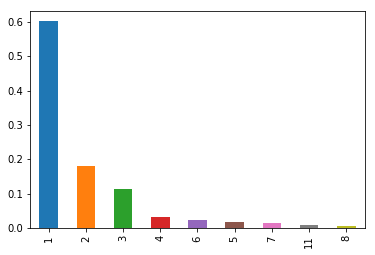

In [241]:


data['Family_size'] = data['SibSp']+data['Parch']+1
submission['Family_size'] = submission['SibSp']+submission['Parch']+1

print(data.Family_size.value_counts()/ np.float(len(data)))

(data.Family_size.value_counts() / np.float(len(data))).plot.bar()

The new variable Family size is discrete, because it is the sum of 2 discrete variables. It takes a finite number of values, and large families were rare on the Titanic. In fact, families larger than 7 people were rare, so we will **cap family size at 7**.

### Task 22.
- Create a feature that indicates that a passenger was a mother

In [242]:
# variable indicating if passenger was a mother
data['is_mother'] = np.where((data.Sex =='female')&(data.Parch>=1)&(data.Age>18),1,0)
submission['is_mother'] = np.where((submission.Sex =='female')&(submission.Parch>=1)&(submission.Age>18),1,0)

data[['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
0,male,0,22.0,0
1,female,0,38.0,0
2,female,0,26.0,0
3,female,0,35.0,0
4,male,0,35.0,0


In [243]:
#data.loc[data.is_mother==1, ['Sex', 'Parch', 'Age', 'is_mother']].head()

### Task 23.
- Print out the number of mothers on the Titanic

In [244]:
print('there were {} mothers in the Titanic'.format(data.is_mother.sum()))

there were 64 mothers in the Titanic


### Types of problems within variables II 

Let's look for missing data, outliers, cardinality and rare labels in the newly created variables.

#### New numerical variables: Missing values

In [245]:
data[['Cabin_numerical', 'Ticket_numerical', 'is_mother', 'Family_size']].isnull().mean()

Cabin_numerical     0.775533
Ticket_numerical    0.004489
is_mother           0.000000
Family_size         0.000000
dtype: float64

Cabin_numerical, as expected contains the same amount of missing data than the original variable Cabin. 

Ticket, also contains a small percentage of missing values. The other newly created variables do not contain missing data, as expected.

#### New numerical variables: Outliers

Text(0.5, 0, 'Ticket number')

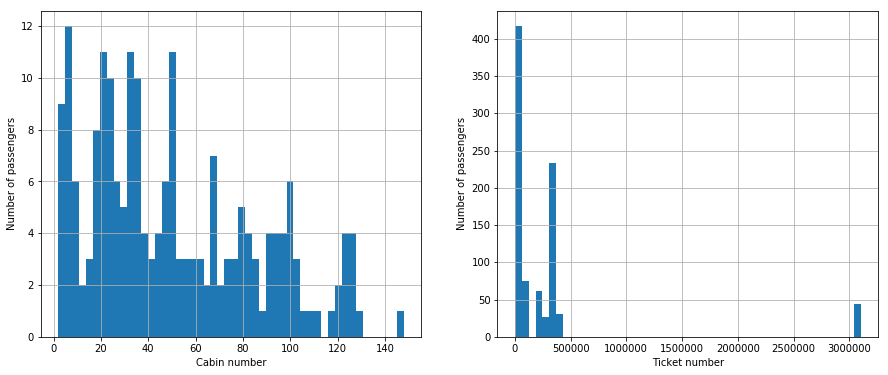

In [246]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Cabin_numerical.hist(bins=50)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Cabin number')

plt.subplot(1, 2, 2)
fig = data.Ticket_numerical.hist(bins=50)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Ticket number')

Text(0, 0.5, 'Ticket number')

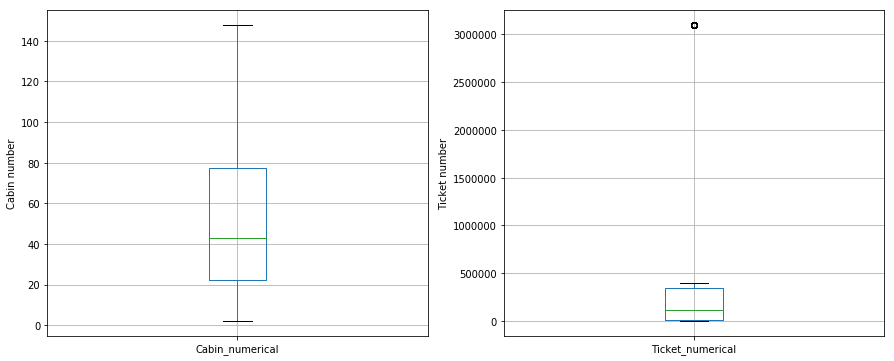

In [247]:
# let's visualise outliers with the boxplot and whiskers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Cabin_numerical')
fig.set_title('')
fig.set_ylabel('Cabin number')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Ticket_numerical')
fig.set_title('')
fig.set_ylabel('Ticket number')

Cabin_numerical does not contain outliers. Ticket_numerical seems to contain a few outliers. Let's find out more about it.

In [248]:
# Ticket numerical
IQR = data.Ticket_numerical.quantile(0.75) - data.Ticket_numerical.quantile(
    0.25)
Lower_fence = data.Ticket_numerical.quantile(0.25) - (IQR * 3)
Upper_fence = data.Ticket_numerical.quantile(0.75) + (IQR * 3)
print(
    'Ticket number outliers are values < {lowerboundary} or > {upperboundary}'.
    format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
passengers = len(data[data.Ticket_numerical > Upper_fence]) / np.float(
    len(data))
print('Number of passengers with ticket values higher than {upperboundary}: {passengers}'.format(upperboundary=Upper_fence, \
                                                                                                 passengers=passengers))

Ticket number outliers are values < -981730.0 or > 1343691.0
Number of passengers with ticket values higher than 1343691.0: 0.04938271604938271


We will use equal width discretisation for this variable.

#### New categorical variables: Missing values

### Task 24. 
- Check missing values for Cabin_categorical, Ticket_categorical, Title

In [249]:
data[['Cabin_categorical', 'Ticket_categorical', 'Title']].isnull().mean()

Cabin_categorical     0.771044
Ticket_categorical    0.000000
Title                 0.000000
dtype: float64

As expected, Cabin contains the same amount of missing data as the original Cabin variable.

The other 2 variables do not show missing data.

#### New categorical variables: cardinality

### Task 25. 
- Print out the number of labels that Cabin_categorical, Ticket_categorical and Title have

In [250]:
for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Cabin_categorical  contains  9  labels
Ticket_categorical  contains  28  labels
Title  contains  5  labels


Title and Cabin are not highly cardinal, Ticket on the other hand has quite a few labels. Let's explore the percentage of passengers within each label to identify rare labels.

#### New categorical variables: rare labels

### Task 26. 
- Calculate how often each category occures for these features: Cabin_categorical, Ticket_categorical and Title 

In [251]:
# rare / infrequent labels (less than 1% of passengers)
for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(data[var].value_counts() / np.float(len(data)))
    print()

C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_categorical, dtype: float64

NAN        0.741863
PC         0.067340
CA         0.046016
A          0.031425
STONO      0.020202
SOTONOQ    0.016835
SCPARIS    0.012346
WC         0.011223
SOC        0.006734
C          0.005612
FCC        0.005612
LINE       0.004489
SCAH       0.003367
WEP        0.003367
PP         0.003367
SOPP       0.003367
SOTONO     0.002245
SWPP       0.002245
PPP        0.002245
SOP        0.001122
CASOTON    0.001122
SP         0.001122
AS         0.001122
SC         0.001122
SCOW       0.001122
FC         0.001122
FA         0.001122
SCA        0.001122
Name: Ticket_categorical, dtype: float64

Mr        0.581369
Miss      0.202020
Mrs       0.144781
Master    0.044893
Other     0.026936
Name: Title, dtype: float64



- Cabin contains the rare labels G and T: replace by most frequent category
- Ticket contains a lot of infrequent labels: replace by rare
- Title does not contain rare labels

Because the number of passengers in the rare cabins is so small, grouping them into a new category called rare, will be in itself rare, and may be prone to over-fitting. This, in cabin, I will replace rare labels by the most frequent category.

In ticket_categorical, on the other hand, the number of infrequent labels is high, therefore grouping them into a new label makes sense. 

### Separate train and test set

### Task 27.
- create a train and test set (80/20)

In [252]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((712, 16), (179, 16))

In [253]:
# let's group again the variables into categorical or numerical
# now considering the newly created variables

def find_categorical_and_numerical_variables(dataframe):
    cat_vars = [col for col in data.columns if data[col].dtypes == 'O']
    num_vars  = [col for col in data.columns if data[col].dtypes != 'O']
    return cat_vars, num_vars
                 
categorical, numerical = find_categorical_and_numerical_variables(data)       

In [254]:
categorical

['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

In [255]:
numerical = [var for var in numerical if var not in ['Survived','PassengerId']]
numerical

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_numerical',
 'Ticket_numerical',
 'Family_size',
 'is_mother']

### Engineering missing values in numerical variables 

In [256]:
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Age 0.19803370786516855
Cabin_numerical 0.776685393258427
Ticket_numerical 0.0056179775280898875


- Age and ticket contains < 50% NA: create additional variable with NA + random sample imputation
- Cabin_numerical contains > 50% NA: impute NA by value far in the distribution

In [257]:
def impute_na(X_train, df, variable):
    # make temporary df copy
    temp = df.copy()
    
    # extract random from train set to fill the na
    random_sample = X_train[variable].dropna().sample(temp[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = temp[temp[variable].isnull()].index
    temp.loc[temp[variable].isnull(), variable] = random_sample
    return temp[variable]

In [258]:
# Age and ticket
# add variable indicating missingness
for df in [X_train, X_test, submission]:
    for var in ['Age', 'Ticket_numerical']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
    
# replace by random sampling
for df in [X_train, X_test, submission]:
    for var in ['Age', 'Ticket_numerical']:
        df[var] = impute_na(X_train, df, var)
    

# Cabin numerical
extreme = X_train.Cabin_numerical.mean() + X_train.Cabin_numerical.std()*3
for df in [X_train, X_test, submission]:
    df.Cabin_numerical.fillna(extreme, inplace=True)

### Engineering Missing Data in categorical variables

### Task 28.
- print out the categorical variables that have missing values

In [259]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Embarked 0.0028089887640449437
Cabin_categorical 0.7710674157303371


- Embarked NA imputed by most frequent category, because NA is low
- Cabin_categorical imputed by 'Missing', because NA is high

In [260]:
# add label indicating 'Missing' to Cabin categorical
# or replace by most frequent label in Embarked

for df in [X_train, X_test, submission]:
    df['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df['Cabin_categorical'].fillna('Missing', inplace=True)

### Task 29.
- Check the sum of all null values for X_train

In [261]:
# check absence of null values
X_train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

### Task 30.
- Check the sum of all null values for X_test

In [262]:
X_test.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

### Task 30.
Check the sum of all null values for submission

In [263]:
submission.isnull().sum()

PassengerId            0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   1
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

### Task 31.
- Fare has one missing value, replace is with median

In [264]:
# Fare in the submission dataset contains one null value, I will replace it by the median 
submission.Fare.fillna(X_train.Fare.median(), inplace=True)

### Outliers in Numerical variables 

As we were analysing the outliers at the beginning of the notebook, we were taking a note on the preprocessing that I thought would be more convenient for each one of them. The notes are summarised here:

- Age: top-coding (73)
- Fare: equal frequency binning
- Sibsp: top-coding (4)
- Parch: top-coding (2)
- Family Size: top-coding (7)
- Ticket_number: equal frequency binning

In [265]:
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test, submission]:
    df['Age'] = top_code(df, 'Age', 73)
    df['SibSp'] = top_code(df, 'SibSp', 4)
    df['Parch'] = top_code(df, 'Parch', 2)
    df['Family_size'] = top_code(df, 'Family_size', 7)

In [266]:
# let's check that it worked
for var in ['Age',  'SibSp', 'Parch', 'Family_size']:
    print(var, ' max value: ', X_train[var].max())

Age  max value:  73.0
SibSp  max value:  4
Parch  max value:  2
Family_size  max value:  7


In [267]:
# let's check that it worked
for var in ['Age',  'SibSp', 'Parch', 'Family_size']:
    print(var, ' max value: ', submission[var].max())

Age  max value:  73.0
SibSp  max value:  4
Parch  max value:  2
Family_size  max value:  7


In [268]:
# find quantiles and discretise train set
X_train['Fare'], bins = pd.qcut(x=X_train['Fare'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Fare'] = pd.cut(x = X_test['Fare'], bins=bins, include_lowest=True)
submission['Fare'] = pd.cut(x = submission['Fare'], bins=bins, include_lowest=True)

In [269]:
submission.Fare.isnull().sum()

0

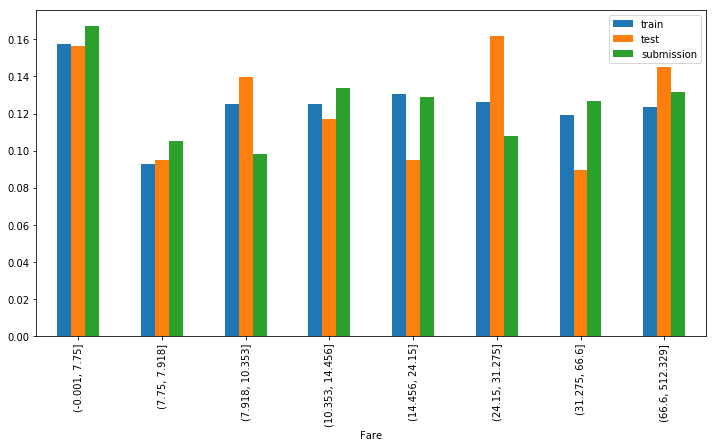

In [270]:
t1 = X_train.groupby(['Fare'])['Fare'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare'])['Fare'].count() / np.float(len(X_test))
t3 = submission.groupby(['Fare'])['Fare'].count() / np.float(len(submission))

temp = pd.concat([t1,t2,t3], axis=1)
temp.columns = ['train', 'test', 'submission']
temp.plot.bar(figsize=(12,6))

In [271]:
# find quantiles and discretise train set
X_train['Ticket_numerical'], bins = pd.qcut(x=X_train['Ticket_numerical'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Ticket_numerical'] = pd.cut(x = X_test['Ticket_numerical'], bins=bins, include_lowest=True)
submission['Ticket_numerical_temp'] = pd.cut(x = submission['Ticket_numerical'], bins=bins, include_lowest=True)

In [272]:
X_test.Ticket_numerical.isnull().sum()

0

In [273]:
submission.Ticket_numerical_temp.isnull().sum()

2

In [274]:
submission[submission.Ticket_numerical_temp.isnull()][['Ticket_numerical', 'Ticket_numerical_temp']]

,Ticket_numerical,Ticket_numerical_temp
186,2.0,NaN
302,2.0,NaN


There are 2 values of ticket in the submission dataset, that could not be placed within the intervals calculated for the training set. let's look at the intervals to understand why this could have been the case.

In [275]:
# inspect the ticket bins in training set
X_train.Ticket_numerical.unique()

[(2.999, 2816.875], (14737.5, 24421.875], (364848.0, 3101317.0], (24421.875, 113053.0], (248701.0, 347077.25], (113053.0, 248701.0], (2816.875, 14737.5], (347077.25, 364848.0]]
Categories (8, interval[float64]): [(2.999, 2816.875] < (2816.875, 14737.5] < (14737.5, 24421.875] < (24421.875, 113053.0] < (113053.0, 248701.0] < (248701.0, 347077.25] < (347077.25, 364848.0] < (364848.0, 3101317.0]]

The lowest bin starts at 2.99, and the values for the tickets in the submission are 2, so slight below the interval. I will bottom code then that variable, and include those 2 values within the lowest interval. See below.

In [276]:
X_train.Ticket_numerical.unique()[0]

Interval(2.999, 2816.875, closed='right')

There are 2 Ticket numerical parts in the submission dataset that are lower than any other in the training set. This I will include those in the lowest interval [2.99-2816]

In [277]:
submission.loc[submission.Ticket_numerical_temp.isnull(), 'Ticket_numerical_temp'] = X_train.Ticket_numerical.unique()[0]
submission.Ticket_numerical_temp.isnull().sum()

0

In [278]:
submission['Ticket_numerical'] = submission['Ticket_numerical_temp']
submission.drop(labels=['Ticket_numerical_temp'], inplace=True, axis=1)
submission.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
0,892,3,male,34.5,0,0,"(7.75, 7.918]",Q,158.222059,Missing,"(248701.0, 347077.25]",NAN,Mr,1,0,0,0
1,893,3,female,47.0,1,0,"(-0.001, 7.75]",S,158.222059,Missing,"(347077.25, 364848.0]",NAN,Mrs,2,0,0,0
2,894,2,male,62.0,0,0,"(7.918, 10.353]",Q,158.222059,Missing,"(113053.0, 248701.0]",NAN,Mr,1,0,0,0
3,895,3,male,27.0,0,0,"(7.918, 10.353]",S,158.222059,Missing,"(248701.0, 347077.25]",NAN,Mr,1,0,0,0
4,896,3,female,22.0,1,1,"(10.353, 14.456]",S,158.222059,Missing,"(364848.0, 3101317.0]",NAN,Mrs,3,1,0,0


### Engineering rare labels in categorical variables (section 9)

In [279]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.65309
female    0.34691
Name: Sex, dtype: float64

Embarked S    0.728933
C    0.181180
Q    0.089888
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.771067
C          0.061798
B          0.050562
E          0.040730
D          0.036517
A          0.021067
F          0.012640
G          0.004213
T          0.001404
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.728933
PC         0.066011
CA         0.050562
A          0.035112
STONO      0.023876
SOTONOQ    0.016854
WC         0.014045
SCPARIS    0.014045
SOC        0.007022
C          0.005618
LINE       0.005618
PP         0.004213
WEP        0.004213
SCAH       0.002809
PPP        0.002809
SOPP       0.002809
FCC        0.002809
SOTONO     0.002809
FC         0.001404
SCA        0.001404
SWPP       0.001404
AS         0.001404
SCOW       0.001404
FA         0.001404
SP         0.001404
Name: Ticket_categorical, dtype: float64

Title Mr        0.589888
Miss      0.200843
Mrs   

- Cabin contains the rare labels G and T: replace by most frequent category
- Ticket contains a lot of infrequent labels: replace by rare

Because the number of passengers in the rare cabins is so small, grouping them into a new category called rare, will be in itself rare, and may be prone to over-fitting. Thus, in cabin, I will replace rare labels by the most frequent category.
In ticket_categorical, on the other hand, the number of infrequent labels is high, therefore grouping them into a new label makes sense.

In [280]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=='frequent':
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)
        submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], mode_label)
    
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
        submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], 'Rare')

In [281]:
rare_imputation('Cabin_categorical', 'frequent')
rare_imputation('Ticket_categorical', 'rare')

In [282]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.65309
female    0.34691
Name: Sex, dtype: float64

Embarked S    0.728933
C    0.181180
Q    0.089888
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.776685
C          0.061798
B          0.050562
E          0.040730
D          0.036517
A          0.021067
F          0.012640
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.728933
PC         0.066011
CA         0.050562
Rare       0.050562
A          0.035112
STONO      0.023876
SOTONOQ    0.016854
WC         0.014045
SCPARIS    0.014045
Name: Ticket_categorical, dtype: float64

Title Mr        0.589888
Miss      0.200843
Mrs       0.140449
Master    0.049157
Other     0.019663
Name: Title, dtype: float64



In [283]:
# let's check that it worked
for var in categorical:
    print(var, submission[var].value_counts()/np.float(len(submission)))
    print()

Sex male      0.636364
female    0.363636
Name: Sex, dtype: float64

Embarked S    0.645933
C    0.244019
Q    0.110048
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.784689
C          0.083732
B          0.043062
D          0.031100
E          0.021531
F          0.019139
A          0.016746
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.708134
PC         0.076555
Rare       0.064593
CA         0.064593
A          0.026316
SOTONOQ    0.021531
SCPARIS    0.019139
WC         0.011962
STONO      0.007177
Name: Ticket_categorical, dtype: float64

Title Mr        0.574163
Miss      0.186603
Mrs       0.172249
Master    0.050239
Other     0.016746
Name: Title, dtype: float64



### Encode categorical variables (section 10)

In [284]:
categorical

['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

- Sex: one hot encoding
- Remaining variables: replace by risk probability

In [285]:
for df in [X_train, X_test, submission]:
    df['Sex']  = pd.get_dummies(df.Sex, drop_first=True)

In [286]:
X_train.Sex.unique()

array([0, 1], dtype=uint64)

In [287]:
X_test.Sex.unique()

array([1, 0], dtype=uint64)

In [288]:
submission.Sex.unique()

array([1, 0], dtype=uint64)

In [289]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        submission[var] = submission[var].map(ordered_labels)

# enccode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'Survived')

In [290]:
# parse discretised variables to object before encoding
for df in [X_train, X_test, submission]:
    df.Fare = df.Fare.astype('O')
    df.Ticket_numerical = df.Ticket_numerical.astype('O')

In [291]:
# encode labels
for var in ['Fare', 'Ticket_numerical']:
    print(var)
    encode_categorical_variables(var, 'Survived')

Fare
Ticket_numerical


In [292]:
#let's inspect the dataset
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
140,141,0,3,0.744939,27.0,0,2,0.397849,0.527132,158.222059,0.307414,0.348315,0.394990,0.790000,3,0,1,0
439,440,0,2,0.191398,31.0,0,0,0.404494,0.342967,158.222059,0.307414,0.573034,0.305556,0.157143,1,0,0,0
817,818,0,2,0.191398,31.0,1,1,0.494118,0.527132,158.222059,0.307414,0.348315,0.500000,0.157143,3,0,0,0
378,379,0,3,0.191398,20.0,0,0,0.223214,0.527132,158.222059,0.307414,0.348315,0.394990,0.157143,1,0,0,0
491,492,0,3,0.191398,21.0,0,0,0.223214,0.342967,158.222059,0.307414,0.306818,0.166667,0.157143,1,0,0,0


We can see that the labels how now been replaced by the survival probability.

### Feature scaling (section 13)

In [293]:
X_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,443.283708,0.383427,2.317416,0.383427,29.807584,0.484551,0.353933,0.383427,0.383427,133.956178,0.383427,0.383427,0.383427,0.383427,1.875000,0.067416,0.198034,0.005618
std,260.003783,0.486563,0.833767,0.263664,14.496489,0.907718,0.673811,0.144616,0.071238,48.398112,0.149408,0.118238,0.098434,0.276532,1.460148,0.250917,0.398798,0.074795
min,1.000000,0.000000,1.000000,0.191398,0.670000,0.000000,0.000000,0.212121,0.342967,2.000000,0.307414,0.166667,0.080000,0.157143,1.000000,0.000000,0.000000,0.000000
25%,211.750000,0.000000,2.000000,0.191398,21.000000,0.000000,0.000000,0.232770,0.342967,158.222059,0.307414,0.321087,0.394990,0.157143,1.000000,0.000000,0.000000,0.000000
50%,441.000000,0.000000,3.000000,0.191398,28.750000,0.000000,0.000000,0.397849,0.342967,158.222059,0.307414,0.370787,0.394990,0.157143,1.000000,0.000000,0.000000,0.000000
75%,671.250000,1.000000,3.000000,0.744939,38.000000,1.000000,0.000000,0.444444,0.421875,158.222059,0.307414,0.474719,0.394990,0.706294,2.000000,0.000000,0.000000,0.000000
max,890.000000,1.000000,3.000000,0.744939,73.000000,4.000000,2.000000,0.659091,0.527132,158.222059,0.758621,0.573034,0.617021,0.790000,7.000000,1.000000,1.000000,1.000000


In [294]:
variables_that_need_scaling = ['Pclass', 'Age', 'Sibsp', 'Parch', 'Cabin_numerical', 'Family_size']

In [295]:
training_vars = [var for var in X_train.columns if var not in ['PassengerId', 'Survived']]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'is_mother',
 'Age_NA',
 'Ticket_numerical_NA']

In [296]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

#### Random Forests

In [297]:
random.seed(1255)
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.9976887197843917
RF test roc-auc: 0.8962450592885375


#### Adaboost

In [298]:
random.seed(1255)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.897344113745025
Adaboost test roc-auc: 0.8706192358366271


#### Logistic regression

#### Logistic regression

### Task 33.
- Add logistic regression
- save the model as logit_model and fit it. 
- use predictions and see how well it performed on train and test set. 

In [299]:
random.seed(1255)
logit_model = LogisticRegression()
logit_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = logit_model.predict_proba(scaler.transform(X_train[training_vars]))
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(scaler.transform(X_test[training_vars]))
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.8724915934483133
Logit test roc-auc: 0.8268774703557312


### Select threshold for maximum accuracy

In [300]:
pred_ls = []
for model in [rf_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(X_test[training_vars])[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.8968379446640315


In [301]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
thresholds

array([1.55888188, 0.55888188, 0.50187253, 0.50159342, 0.47423837,
       0.47179226, 0.47033421, 0.46955088, 0.46939473, 0.4688604 ,
       0.43629949, 0.43534214, 0.40182504, 0.40145839, 0.39802997,
       0.39684695, 0.36965452, 0.36741955, 0.36583323, 0.33524449,
       0.33354683, 0.33280965, 0.33234854, 0.33029069, 0.32977161,
       0.32901621, 0.30419609, 0.30251698, 0.3018596 , 0.30075289,
       0.29967226, 0.29884138, 0.29828196, 0.26900752, 0.26855621,
       0.26579832, 0.26424045, 0.23503197, 0.23426526, 0.23126321,
       0.23056736, 0.22892751, 0.20105689, 0.19758984, 0.19743314,
       0.19445746, 0.19421881, 0.16326269, 0.16289466, 0.1627816 ,
       0.16266803, 0.16258244, 0.16257619, 0.16226752, 0.16208205,
       0.16200991, 0.16172222, 0.16162961, 0.16108092, 0.16082986,
       0.16058705, 0.16046492, 0.15905472])

In [302]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
15,0.396847,0.849162
13,0.401458,0.849162
12,0.401825,0.843575
17,0.367420,0.843575
16,0.369655,0.843575


### Submission to Kaggle

In [303]:
pred_ls = []
for model in [rf_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(submission[training_vars])[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)

In [304]:
final_pred = pd.Series(np.where(final_pred>0.40,1,0))

In [305]:
temp = pd.concat([submission.PassengerId, final_pred], axis=1)
temp.columns = ['PassengerId', 'Survived']
temp.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [306]:
temp.to_csv('submit_titanic.csv', index=False)

### Feature importance

### Task 34.
- use function rf_model.feature_importances_ and check which features are important
- save it to object important
- set importance.index eqal to training_vars
- sort either as ascending or descending
- make a graphical representation of the most important features

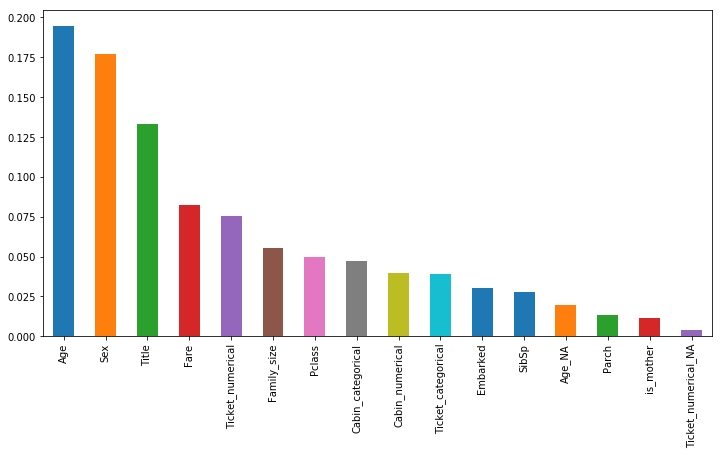

In [307]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

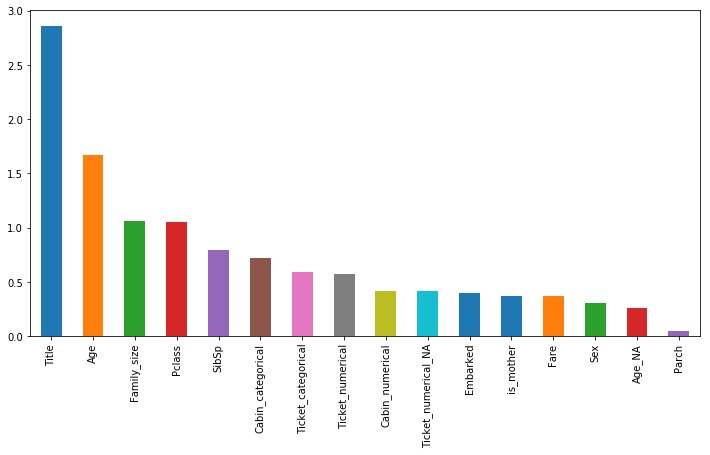

In [310]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))